# __Learning X2K: Genetic Algorithm Results__

## __Import data__

In [38]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
import numpy as np
import matplotlib.pyplot as plt
# Import my functions
import Python_scripts.Extra_X2K_functions as Ex

# Data   
GA_output_name = 'GA_results.npy'
results_file = 'GA_Results/'+GA_output_name
GA_Results = np.load(results_file)
# Extract subsets
## Subset 1
GAresults_Subset1 = GA_Results[0]
allPopulations = GAresults_Subset1[0]# Get all populations
allFitnesses = GAresults_Subset1[1] # Get all fitnesses
averageFitness = GAresults_Subset1[2] # Get averageFitness per generation
peakFitness = GAresults_Subset1[3] # Get the peakFitness per generation
GAsettings = GAresults_Subset1[4]
## Subset 2
allFitnesses_Subset2 = GA_Results[1]
averageFitness_Subset2 = GA_Results[2]
peakFitness_Subset2 = GA_Results[3]

## __GA Settings__

In [41]:
GAsettings

{'breedingVariation': 0,
 'childrenPerGeneration': 90,
 'crossoverPoints': 4,
 'includeFittestParents': 10,
 'initialPopSize': 100,
 'mutationRate': 0.01,
 'numberOfGenerations': 50,
 'parameterLength': 28,
 'topNum': 10}

## Report Peak Fitnesses

In [37]:
print('Peak fitness for X2K GA, Subset1 = '+str(round(peakFitness[-1],2))+'%')
print('Peak fitness for X2K GA, Subset2 = '+str(round(peakFitness_Subset2[-1],2))+'%\n')
print("===============================\n")
print('OPTIMIZED PARAMETERS:')
print(str(Ex.tell_parameters(Ex.getFittestIndividual(GAresults_Subset1))))

Peak fitness for X2K GA, Subset1 = 47.69%
Peak fitness for X2K GA, Subset2 = 47.69%


OPTIMIZED PARAMETERS:

___CHEA Parameters___
run;rank;both;transfac;hg133;10

___G2N Parameters___
run;BIND,DIP,INNATEDB,KEGG;2

___KEA Parameters___
run;rank;hg133;P;10

('run;rank;both;transfac;hg133;10', 'run;BIND,DIP,INNATEDB,KEGG;2', 'run;rank;hg133;P;10')


## __Plot Subset1__

### Average and Peak Fitness

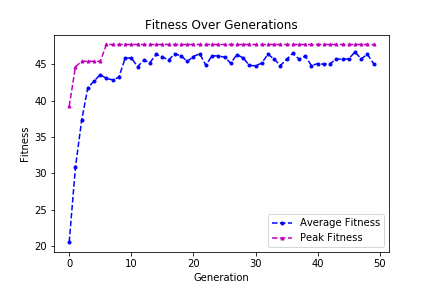

In [3]:
x = range(len(averageFitness))
y1 = averageFitness
y2 = peakFitness
plt.plot(x, y1, 'bo--', markersize=3, label='Average Fitness')
plt.plot(x, y2, 'm^--', markersize=3, label='Peak Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations')
plt.legend(loc='lower right')
plt.gcf().set_facecolor('white');

## __Overfitting Tests__

### Average fitness 

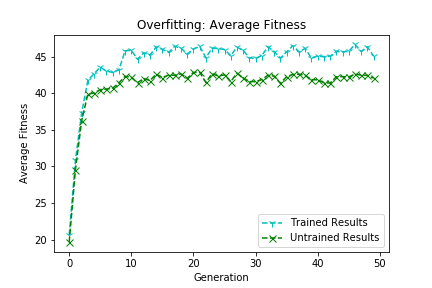

In [4]:
y_s1 = GAresults_Subset1[2] # average fitness for each generation in TRAINED data
y_s2 = averageFitness_Subset2
x = range(len(y_s1))
plt.plot(x, y_s1, 'c1--', markersize=7, label="Trained Results")
plt.plot(x, y_s2, 'gx--', markersize=7, label="Untrained Results")
plt.title('Overfitting: Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Average Fitness')
plt.legend(loc='lower right')
plt.gcf().set_facecolor('white');

### Peak fitness

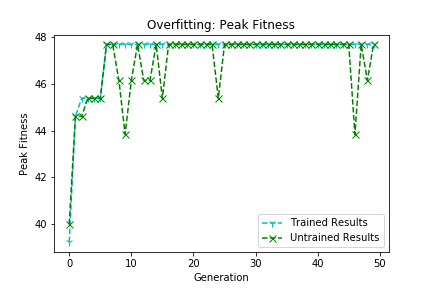

In [6]:
y_s1 = GAresults_Subset1[3] # average fitness for each generation in TRAINED data
y_s2 = peakFitness_Subset2
x = range(len(y_s1))
plt.plot(x, y_s1, 'c1--', markersize=7, label="Trained Results")
plt.plot(x, y_s2, 'gx--', markersize=7, label="Untrained Results")
plt.title('Overfitting: Peak Fitness')
plt.xlabel('Generation')
plt.ylabel('Peak Fitness')
plt.legend(loc='lower right')
plt.gcf().set_facecolor('white');

### Plot the distribution of ALL fitnesses in 1st, 2nd & final populations

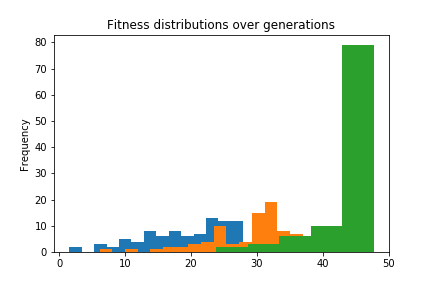

In [8]:
plt.hist( allFitnesses[0], bins=20) # 1st
plt.hist( allFitnesses[1], bins=20) # 2nd
plt.hist( allFitnesses[-1], bins=5) # Last
plt.ylabel('Frequency')
plt.title('Fitness distributions over generations')
plt.gcf().set_facecolor('white');

## __4. X2K Parameters vs. Fitness Analyses__

### Plot Fitness and Parameter Evolution Over Time

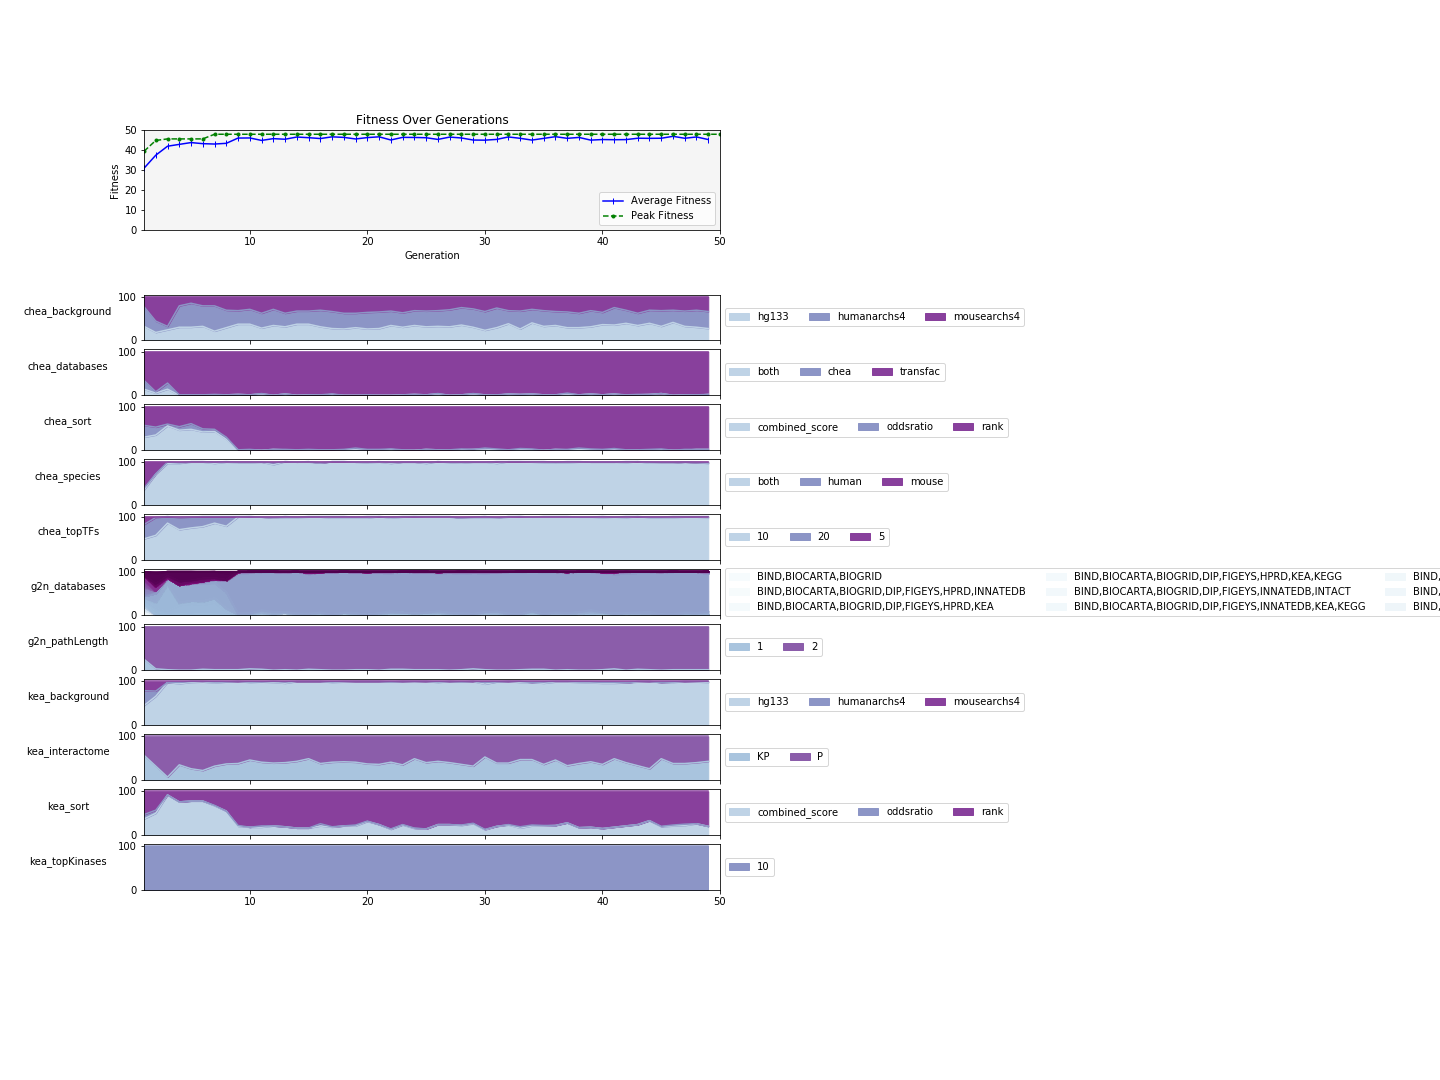

In [11]:
Ex.parameterEvolutionPlot(GAresults_Subset1,figsize=(20,15));

### One-way ANOVAs: Each parameter vs. Fitness

In [7]:
Ex.parameterStats(GAresults_Subset1)

/Users/schilder/Library/Python/3.6/lib/python/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                        sum_sq      df            F         PR(>F)      Sig
chea_background      70.971008     2.0     0.807590   4.459897e-01  non-sig
Residual         219568.191595  4997.0          NaN            NaN  non-sig
chea_databases    39300.348642     2.0   544.485787  1.194003e-214     ****
Residual         180338.813962  4997.0          NaN            NaN     ****
chea_sort         28363.663194     2.0   370.494981  9.204261e-151     ****
Residual         191275.499409  4997.0          NaN            NaN     ****
chea_species      39379.019947     2.0   545.813844  4.013683e-215     ****
Residual         180260.142656  4997.0          NaN            NaN     ****
chea_topTFs       39321.442368     2.0   544.841758  8.914126e-215     ****
Residual         180317.720236  4997.0          NaN            NaN     ****
g2n_databases    150338.828717   170.0    61.623182   0.000000e+00     ****
Residual          69300.333887  4829.0          NaN            NaN     ****
g2n_pathLeng

,sum_sq,df,F,PR(>F),Sig
chea_background,70.971008,2.0,0.807590,4.459897e-01,non-sig
Residual,219568.191595,4997.0,NaN,NaN,non-sig
chea_databases,39300.348642,2.0,544.485787,1.194003e-214,****
Residual,180338.813962,4997.0,NaN,NaN,****
chea_sort,28363.663194,2.0,370.494981,9.204261e-151,****
Residual,191275.499409,4997.0,NaN,NaN,****
chea_species,39379.019947,2.0,545.813844,4.013683e-215,****
Residual,180260.142656,4997.0,NaN,NaN,****
chea_topTFs,39321.442368,2.0,544.841758,8.914126e-215,****
Residual,180317.720236,4997.0,NaN,NaN,****
